In [66]:
%matplotlib inline
from collections import defaultdict, namedtuple
from kid_readout.measurement.io import npy
from kid_readout.analysis.timeseries import filters
from scipy import stats

In [115]:
npd110 = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')
npd150 = npy.NumpyDirectory('/data/detectors/2016-10-18_161556_sweep_stream_on_off/')

In [122]:
# LO index 1, Attenuation 20
big1_110 = npd110.SingleSweepStream16
big1_150 = npd150.SingleSweepStream16

In [117]:
big1_110.state.lo_index

1

In [118]:
big1_110.stream.roach_state.dac_attenuation

20.0

In [119]:
big1_110.set_q_and_x(deglitch=True)
big1_110.set_S(window=plt.mlab.window_hanning)
big1_150.set_q_and_x(deglitch=True)
big1_150.set_S(window=plt.mlab.window_hanning)

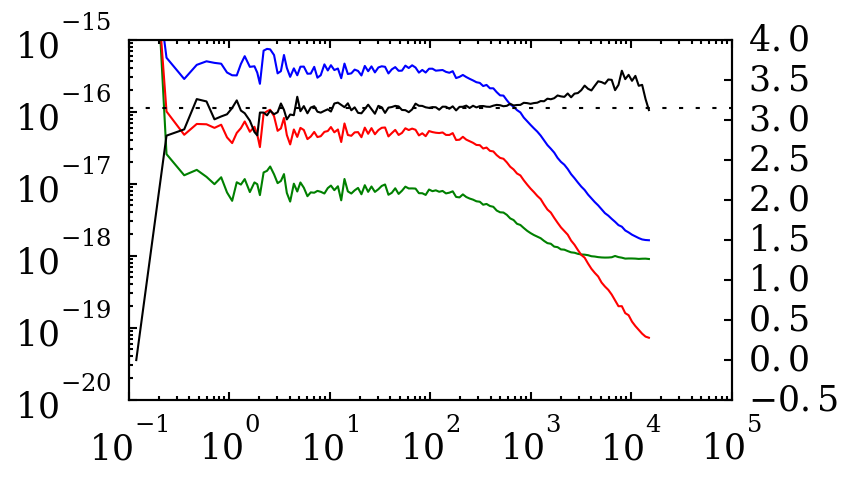

In [108]:
fig, ax = plt.subplots()
phi_ax = ax.twinx()
ax.loglog(big1_110.S_frequency, big1_110.S_xx, '-b')
ax.loglog(big1_110.S_frequency, big1_110.S_yy, '-g')
ax.loglog(big1_110.S_frequency, np.abs(big1_110.S_xy), '-r')
phi_ax.semilogx(big1_110.S_frequency, np.unwrap(np.angle(big1_110.S_xy)), '-k')
phi_ax.axhline(np.pi, color='k', linestyle=':')
ax.set_ylim(1e-20, 1e-15);

In [109]:
def plot_lpf(sss, x_ax, q_ax, cutoff=1/16, num_taps=256):
    f_nyquist = sss.stream.stream_sample_rate / 2
    x_lpf = filters.low_pass_fir(data=sss.x, num_taps=num_taps,
                                 nyquist_freq=sss.stream.stream_sample_rate / 2,
                                 cutoff=cutoff)
    q_lpf = filters.low_pass_fir(data=sss.q, num_taps=num_taps,
                                 nyquist_freq=sss.stream.stream_sample_rate / 2,
                                 cutoff=cutoff)
    x_ax.plot(sss.stream.sample_time, sss.x, color='blue', alpha=0.2)
    x_ax.plot(sss.stream.sample_time[-x_lpf.size:], x_lpf, color='blue')
    q_ax.plot(sss.stream.sample_time, sss.q, color='green', alpha=0.2)
    q_ax.plot(sss.stream.sample_time[-q_lpf.size:], q_lpf, color='green')
    x_ax.tick_params(labelsize=5)
    q_ax.tick_params(labelsize=5)

In [110]:
cutoff = 1 / 1024

In [111]:
cutoff * big1.stream.stream_sample_rate / 2

15.2587890625

(10, 12)

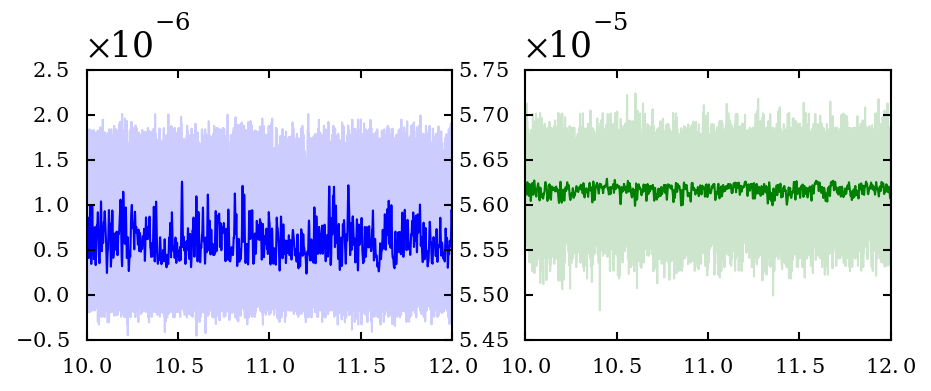

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
plot_lpf(big1, axes[0], axes[1], cutoff=cutoff)
axes[0].set_xlim(10, 12)
axes[1].set_xlim(10, 12)

In [113]:
stats.skew(big1.x)

0.5938138365745544

In [114]:
stats.skew(big1.q)

-0.11078555136919022

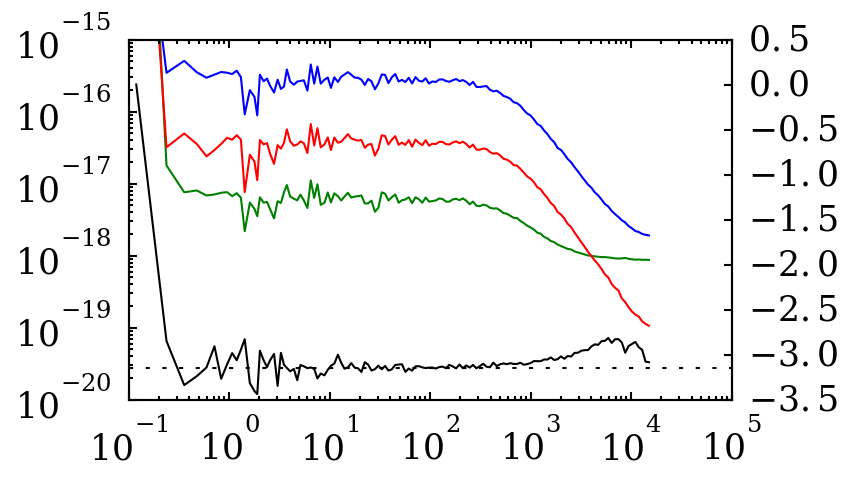

In [121]:
fig, ax = plt.subplots()
phi_ax = ax.twinx()
ax.loglog(big1_150.S_frequency, big1_150.S_xx, '-b')
ax.loglog(big1_150.S_frequency, big1_150.S_yy, '-g')
ax.loglog(big1_150.S_frequency, np.abs(big1_150.S_xy), '-r')
phi_ax.semilogx(big1_150.S_frequency, np.unwrap(np.angle(big1_150.S_xy)), '-k')
phi_ax.axhline(-np.pi, color='k', linestyle=':')
ax.set_ylim(1e-20, 1e-15);